# Chapter 07 索引
## 7.1 进阶索引

In [1]:
import numpy as np
rng = np.random.default_rng(seed=1701)

x = rng.integers(100, size=10)
print(x)


[90 40  9 30 80 67 39 15 33 79]


In [2]:
[x[3], x[7], x[2]]


[30, 15, 9]

In [3]:
ind = [3, 7, 4]
x[ind]


array([30, 15, 80])

In [4]:
ind = np.array([[3, 7], [4, 5]])
x[ind]


array([[30, 15],
       [80, 67]])

In [5]:
X = np.arange(12).reshape(3, 4)
X


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]


array([ 2,  5, 11])

In [7]:
X[row[:, np.newaxis], col]


array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## 7.2 混合索引

In [8]:
print(X)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [9]:
X[2, [2, 0, 1]]


array([10,  8,  9])

In [10]:
X[1:, [2, 0, 1]]


array([[ 6,  4,  5],
       [10,  8,  9]])

In [11]:
mask = np.array([True, False, True, False])
X[row[:, np.newaxis], mask]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## 7.3 Example: Selecting Random Points

In [12]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rng.multivariate_normal(mean, cov, 100)
X.shape


(100, 2)

/tmp/ipykernel_193722/2548493164.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


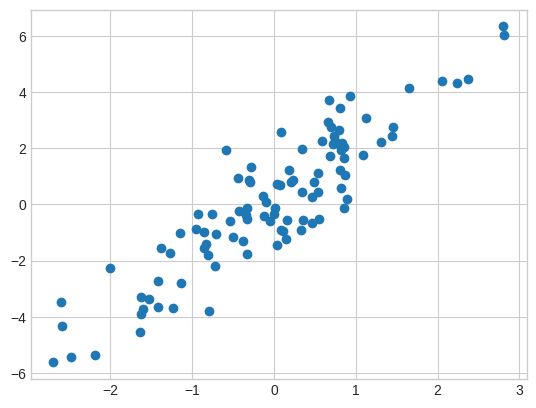

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

plt.scatter(X[:, 0], X[:, 1])


In [14]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices


array([83, 20, 97, 89, 25, 88, 32, 85, 67, 40, 60, 49, 68, 75, 11, 79, 18,
       24,  8,  3])

In [15]:
selection = X[indices]
selection.shape


(20, 2)

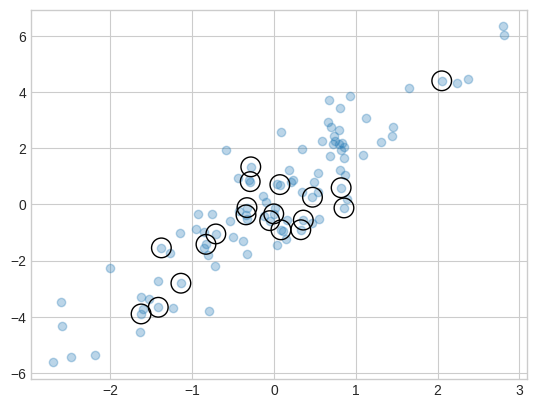

In [16]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', edgecolor='black', s=200)


## 7.4 使用fancy indexing 进行修改

In [17]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)


[ 0 99 99  3 99  5  6  7 99  9]


In [18]:
x[i] -= 10
print(x)


[ 0 89 89  3 89  5  6  7 89  9]


In [19]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)


[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x


array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [21]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)


[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## 7.5 Example: Binning Data

In [22]:
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)
np.add.at(counts, i, 1)


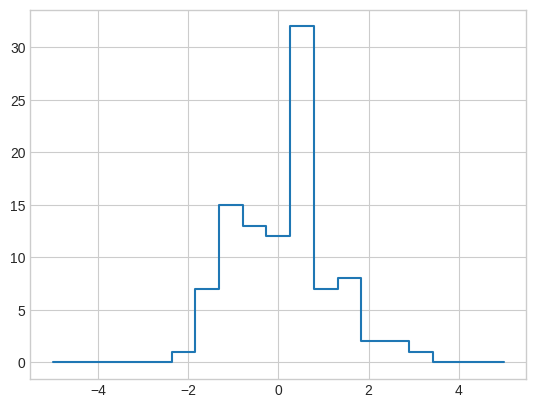

In [23]:
plt.plot(bins, counts, drawstyle='steps')
